In [19]:
import unidecode
import os, sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pyandro.dictionary as dictionary

# read and parse dictionary file
words = dictionary.read_dictionary('dictionary.csv')

# sort words without accents
sorted_words = sorted(words, key=lambda x: x['noaccent_word'].lower())

basic = (x['speech'] for x in filter(lambda x: x['type'] not in ['name', 'phraseology', 'proper'], words))
pl = (x['pl_speech'] for x in filter(lambda x: 'pl' in x, words))
pst = (x['pst_speech'] for x in filter(lambda x: 'pst' in x, words))
fem = (x['fem_speech'] for x in filter(lambda x: 'fem' in x and x['fem'] != 'FEM', words))
supl = (x['supl_speech'] for x in filter(lambda x: 'supl' in x, words))
comp = (x['comp_speech'] for x in filter(lambda x: 'comp' in x, words))

final = (y + '\n' for y in sorted(list(basic) + list(pl) + list(pst) + list(fem) +
                list(supl) + list(comp), key=lambda x: unidecode.unidecode(x).replace('[?]', '')))

(array([ 162., 1293., 1456.,  429.,   85.,   18.,    3.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

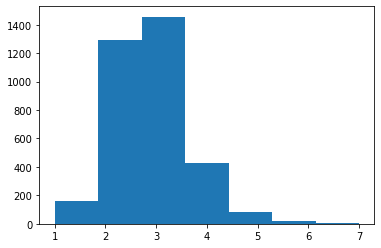

In [20]:
import numpy as np
import matplotlib.pyplot as plt

lengths = list(map(lambda x: len(x.split('.')), final))

plt.hist(lengths, bins=max(lengths))